# Netflix EDA for movies and tv shows in last few years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [2]:
### Data set source kaggle ---> https://www.kaggle.com/datasets/shivamb/netflix-shows
df = pd.read_csv('./data/netflix_titles.csv') 
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Explore Data

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum() ## checking for null

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.type.unique()  ## Only 2 type of series 

array(['Movie', 'TV Show'], dtype=object)

In [7]:
df.director.count() ## non null 

6173

In [8]:
df.director.nunique()

4528

In [9]:
df.director.notnull().sum()

6173

In [10]:
df.director.nunique()


4528

##  ------ Questions For Analyzing Data ---------

### 1. Year when highest movie/tv show released ?
### 2. Top country for releasing movie/tv show ?
### 3. Director who direct highest number of movies or tv show ?
### 4. Percentage of movies vs tv shows?
### 5. Which month netflix add more content?
### 6. Most working actor/actress ?

## --------- Cleaning and taking insights from data ---------

### Change the date added to datetime and then only year and month value and store in to new col

In [11]:
df['listing_month'] = pd.DatetimeIndex(df.date_added).month_name()
df['date_added'] = pd.DatetimeIndex(df['date_added']).year.astype('Int64')
df.rename(columns = {'date_added':'listing_year'}, inplace = True)

### Filter movies and tv show by their type and store in to new col for taking count latter

In [12]:
movies_show_id = df[df.type == 'Movie'].show_id
tv_shows_id = df[df.type == 'TV Show'].show_id

In [13]:
df['movies']= movies_show_id
df['tv_shows'] = tv_shows_id
# df[['movies', 'tv_shows']] = df[['movies', 'tv_shows']].fillna(0)

In [14]:
df = df.drop(columns=['release_year']) ## drop release_year col

In [15]:
df.cast = df.cast.str.strip() ### Remove white spaces in the cast col

In [16]:
df.head(3)

,show_id,type,title,director,cast,country,listing_year,rating,duration,listed_in,description,listing_month,movies,tv_shows
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,s1,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,NaN,s2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,NaN,s3


## ANSWER 1 (Movies and TV Shows Tren With Year)

### Forming group with date added and take their unique values of movies and tv shows

In [17]:
dk = df.groupby('listing_year').nunique()

In [18]:
dk = dk[['movies', 'tv_shows']]
# dk.get_group(2008.0)

In [19]:
dk.index

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021],
      dtype='Int64', name='listing_year')

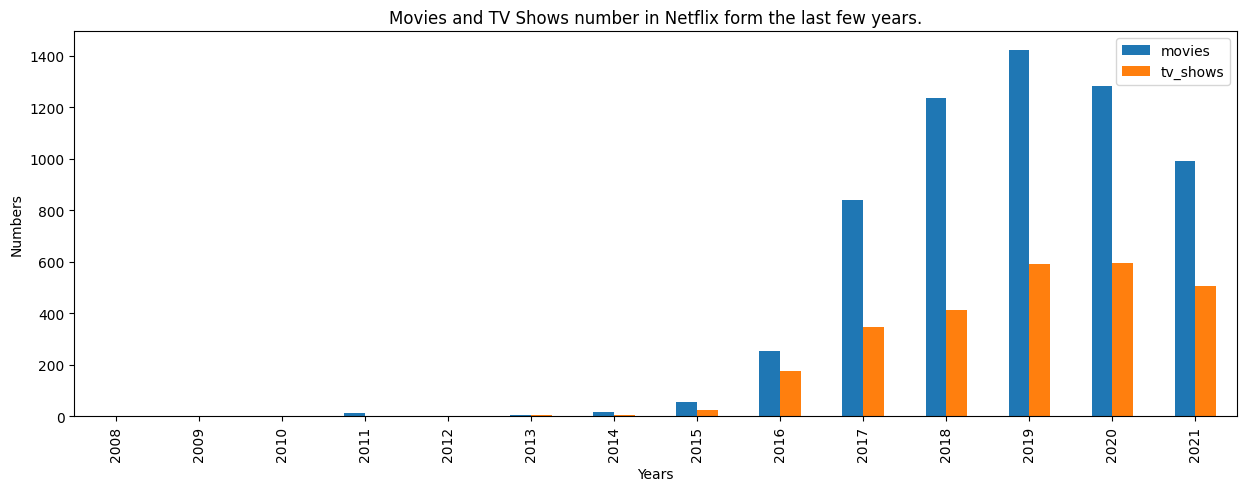

In [20]:
dk.plot(kind='bar',figsize=(15,5), title="Movies and TV Shows number in Netflix form the last few years.",
       xlabel='Years', ylabel='Numbers'
       );

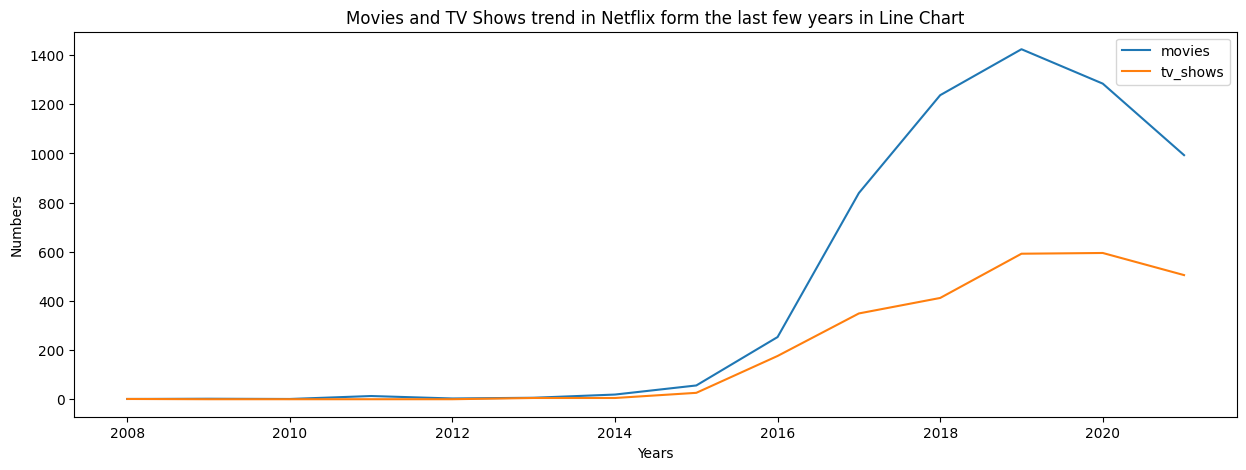

In [21]:
dk.plot(figsize=(15,5), title="Movies and TV Shows trend in Netflix form the last few years in Line Chart",
       xlabel='Years', ylabel='Numbers');

## ANSWER 2 (Movies and TV Show With Countries)

### Forming group with countries and take their unique values of movies and tv shows


#### Two data set one with movies and country and other is tv shows and country

In [23]:
dcm = pd.DataFrame()
dct = pd.DataFrame()
dcm['movies'] = df.groupby('country').movies.nunique().sort_values(ascending=False)
dct['tv_shows'] = df.groupby('country').tv_shows.nunique().sort_values(ascending=False)
dcm = dcm[:5]
dct = dct[:5]
dct,dcm

(                tv_shows
 country                 
 United States        760
 United Kingdom       213
 Japan                169
 South Korea          158
 India                 79,
                 movies
 country               
 United States     2058
 India              893
 United Kingdom     206
 Canada             122
 Spain               97)

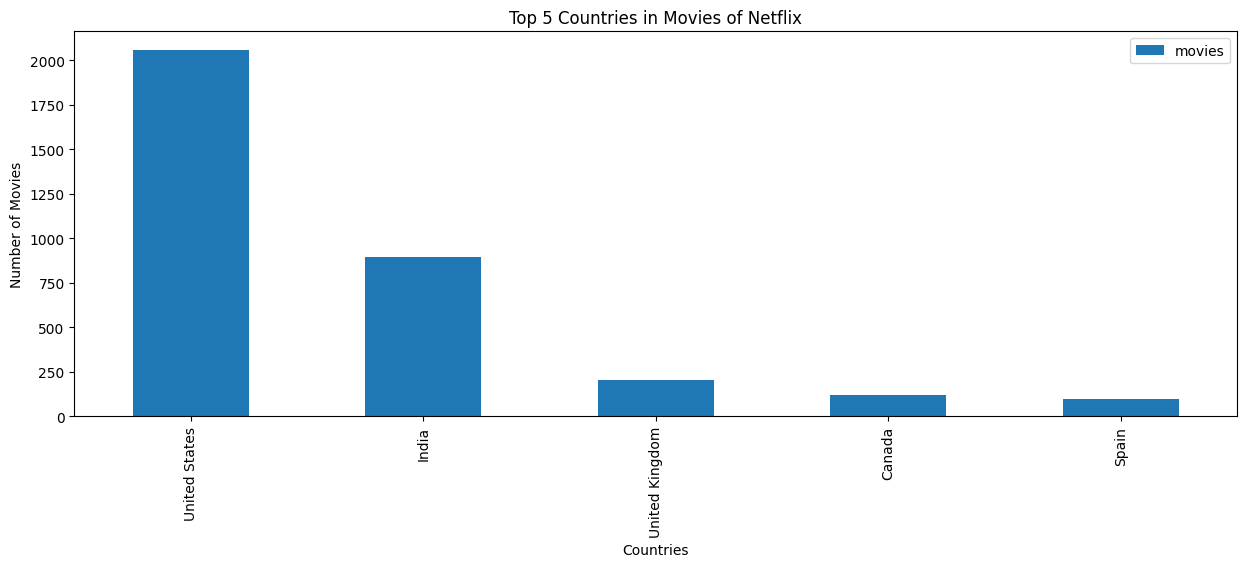

In [24]:
dcm.plot(kind='bar',
         title='Top 5 Countries in Movies of Netflix',
         xlabel='Countries', ylabel='Number of Movies', 
         figsize=(15,5));

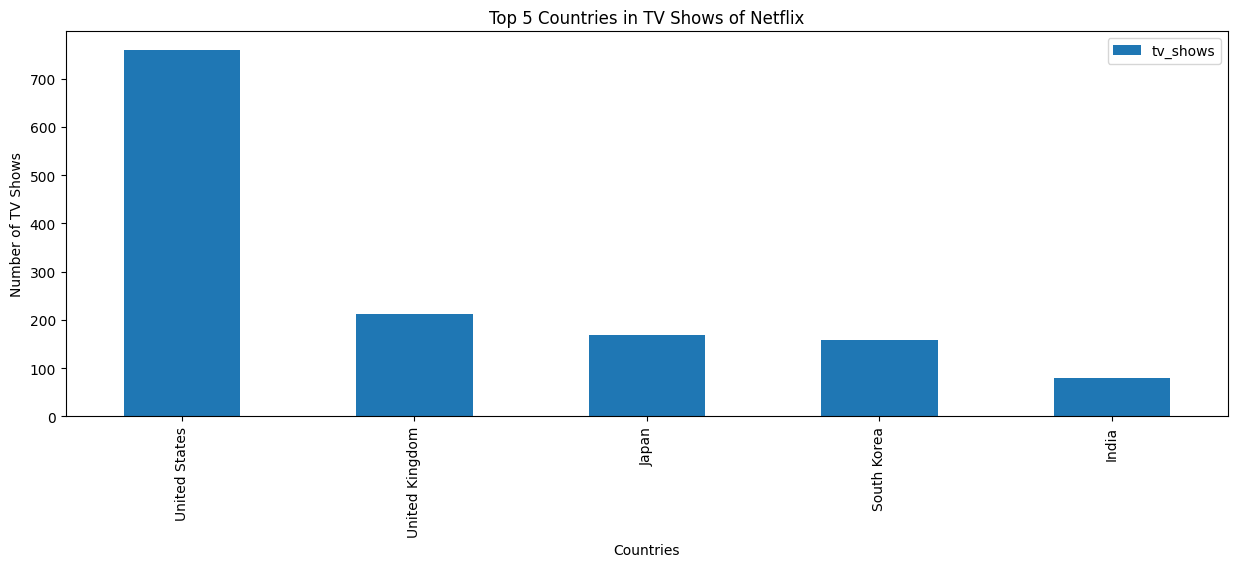

In [25]:
dct.plot(kind='bar', title='Top 5 Countries in TV Shows of Netflix', 
         xlabel='Countries', ylabel='Number of TV Shows', 
         figsize=(15,5));

## ANSWER 3 : (Director with Most Movies and TV Show Seperately)

### Forming group with director and count movies and tv shows

In [26]:
ddm = df.groupby('director').movies.nunique().sort_values(ascending=False)[:5]
ddt = df.groupby('director').tv_shows.nunique().sort_values(ascending=False)[:5]  # only top 5
ddm

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Name: movies, dtype: int64

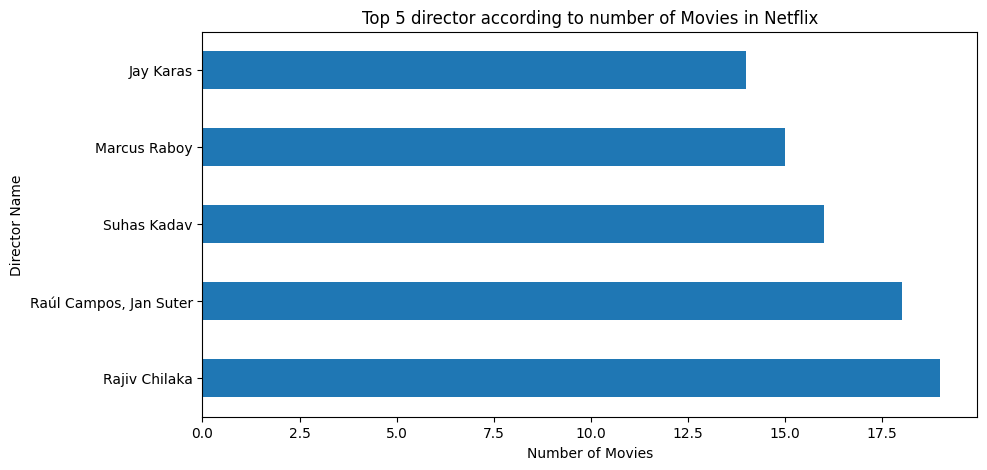

In [27]:
ddm.plot(kind='barh', title='Top 5 director according to number of Movies in Netflix', xlabel='Number of Movies',
        ylabel='Director Name', figsize=(10,5));

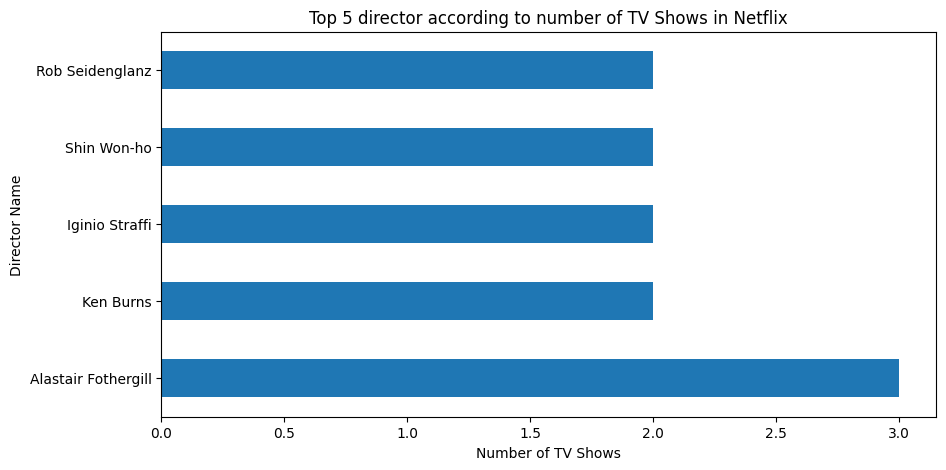

In [28]:
ddt.plot(kind='barh', title='Top 5 director according to number of TV Shows in Netflix',
         xlabel='Number of TV Shows',
        ylabel='Director Name', 
         figsize=(10,5));

## ANSWER 4: (Percentage of Movies and TV Shows in Netflix)

In [40]:
df.head(2)

,show_id,type,title,director,cast,country,listing_year,rating,duration,listed_in,description,listing_month,movies,tv_shows
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,s1,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,NaN,s2


In [30]:
number_of_movies = df.movies.count().sum()
number_of_tv_shows = df.tv_shows.count().sum()

movie_percentage = (number_of_movies / (number_of_movies + number_of_tv_shows)) * 100
tv_show_percentage = (number_of_tv_shows / (number_of_movies + number_of_tv_shows)) * 100

movie_percentage

69.61507891449983

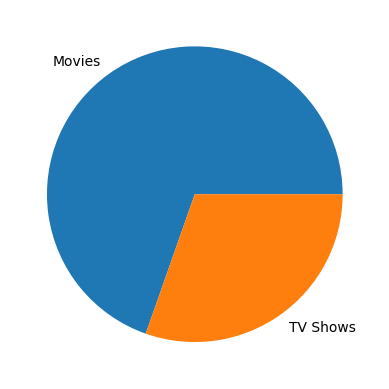

In [31]:
data_for_pi_chart = [movie_percentage, tv_show_percentage]
data_label = ["Movies", "TV Shows"]


plt.pie(data_for_pi_chart, labels=data_label);

## ANSWER 5: (Months Data With Uploading Content in Netflix)

In [32]:
6131 + 2676

8807

In [33]:
df.isna().sum()

show_id             0
type                0
title               0
director         2634
cast              825
country           831
listing_year       10
rating              4
duration            3
listed_in           0
description         0
listing_month      10
movies           2676
tv_shows         6131
dtype: int64

### Direct value counts of months (as all content at once) [If you want seperate then do grouping]

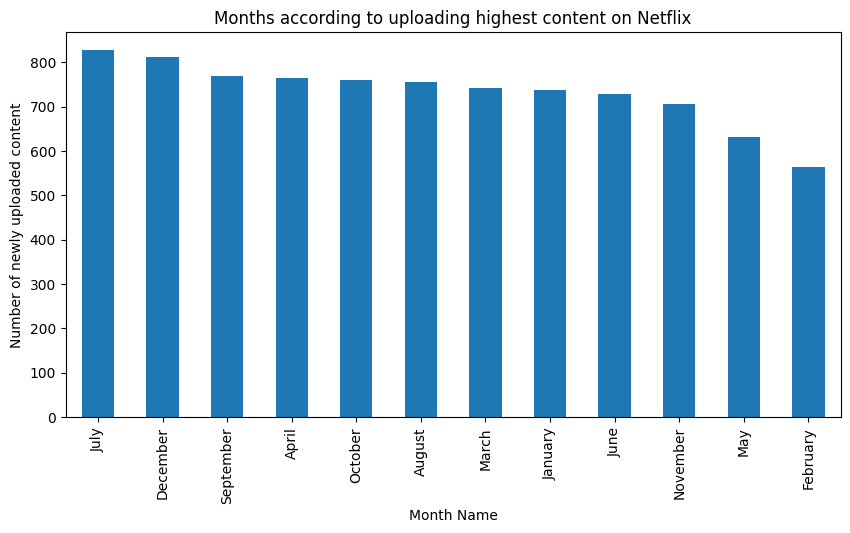

In [35]:
df.listing_month.value_counts().plot(kind='bar', title='Months according to uploading highest content on Netflix',
                                    xlabel='Month Name', ylabel='Number of newly uploaded content',
                                     figsize=(10,5)
                                    );

### If you want to seperate the data

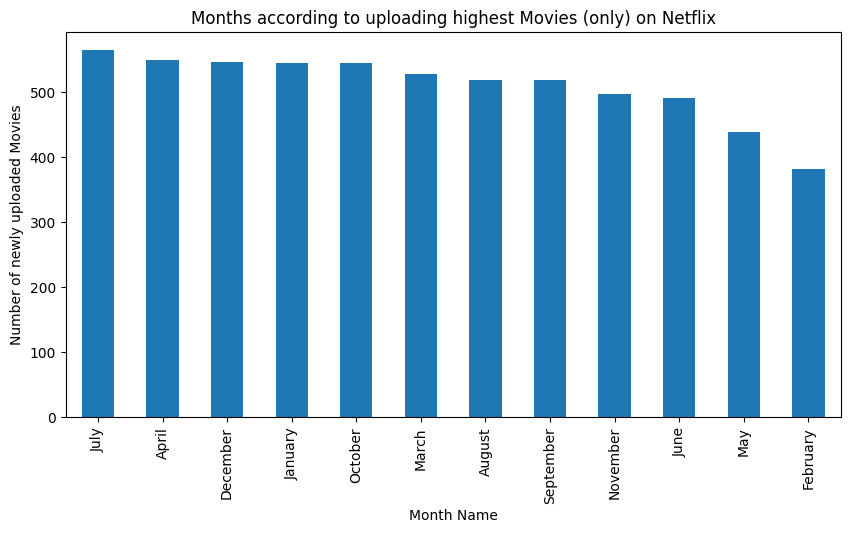

In [36]:
df.groupby('listing_month').movies.nunique().sort_values(ascending=False).plot(kind='bar', 
                                    title='Months according to uploading highest Movies (only) on Netflix',
                                    xlabel='Month Name', ylabel='Number of newly uploaded Movies',
                                     figsize=(10,5)
                                    );

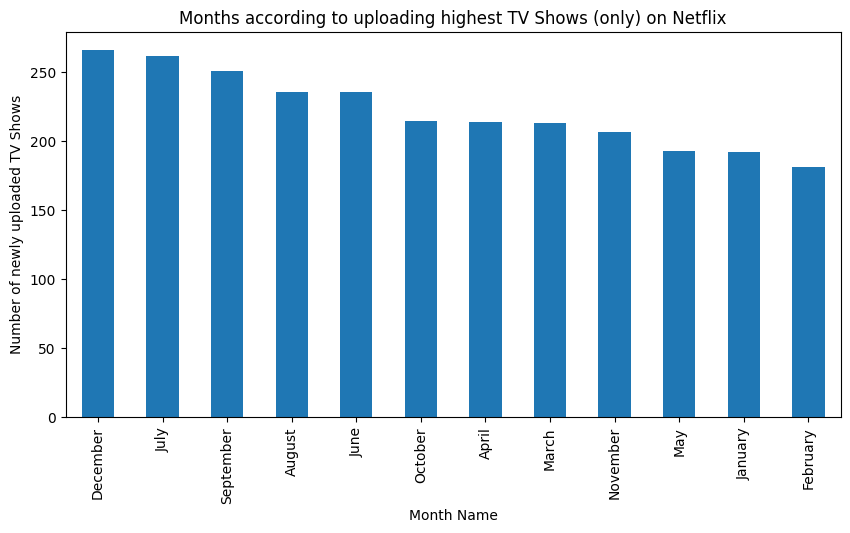

In [37]:
df.groupby('listing_month').tv_shows.nunique().sort_values(ascending=False).plot(kind='bar',
                                    title='Months according to uploading highest TV Shows (only) on Netflix',
                                    xlabel='Month Name', ylabel='Number of newly uploaded TV Shows',
                                     figsize=(10,5)
                                    );

## ANSWER 6: (Actors/Actresses Associated With More Projects in Netflix)

In [38]:
df.head(2)

,show_id,type,title,director,cast,country,listing_year,rating,duration,listed_in,description,listing_month,movies,tv_shows
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,s1,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,NaN,s2


### Looping through all elements of cast multiple time and hold the all name in the new series then count their number

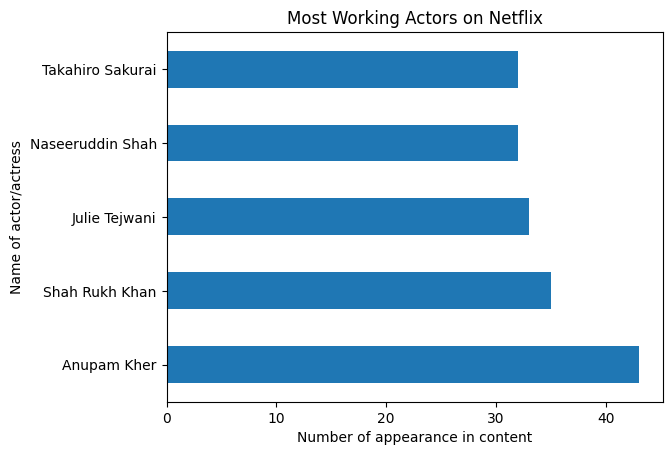

In [39]:
df_subset = df.cast.dropna()
actors_arr = []

for list_cast in df_subset:
    arr = list_cast.split(',')
    for actor in arr:
        actors_arr.append(actor.strip())
    


actors = pd.Series(actors_arr)
actors.value_counts()[:5].plot(kind='barh',title='Most Working Actors on Netflix', 
                              xlabel='Number of appearance in content', ylabel='Name of actor/actress',
                              );